In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import random

In [2]:
#This Function is to generate a vector v of size n with none-negative values
def generate_vector(n):
    random.seed(42)
    return [random.random() for _ in range(n)]

In [3]:
# This function is to measure the time needed to apply a function (func) on an array (v) averaged on (runs) times
def measure_time(func, v, runs=5):
    func(v)  # warm-up
    times = []
    for _ in range(runs):
        start = time.perf_counter()
        func(v)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / len(times)

In [88]:
# This function is to measure the time needed to apply a function (func) on an two square arrays (A,B) averaged on (runs) times
def measure_time_A_B(func, A, B, runs=5):
    func(A, B)  # warm-up
    times = []
    for _ in range(runs):
        start = time.perf_counter()
        func(A, B)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / len(times)

In [5]:
#Simple Constant function
def constant_function(v):
    return 3

In [6]:
# Simple function that returns the sum of an array(v)'s elements
def sum_elements(v):
    return sum(v)

In [7]:
# Simple function that returns the product of an array(v)'s elements
def product_elements(v):
    product = 1
    for x in v:
        product *= x
    return product

In [69]:
#Function that returns the value of a polynomial made up the vector(v)'s coefficient at (x=0.09) I used this value because i ran into numerical problems when I used x=1.5, in the direct way
def poly_direct(v, x=1.5):
    return sum(v[i] * (x ** i) for i in range(len(v)))

In [9]:
#Function that returns the value of a polynomial made up the vector(v)'s coefficient at (x=1.5), using Horners method
def poly_horner(v, x=1.5):
    result = 0
    for coeff in reversed(v):
        result = result * x + coeff
    return result

In [10]:
# A function to apply bubble sort algorithm on a vector v
def bubble_sort(v):
    v = v.copy()
    n = len(v)
    for i in range(n):
        for j in range(0, n - i - 1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

In [11]:
# A function to apply quick sort algorithm on a vector v
def quick_sort(v):
    v = v.copy()
    def _quick_sort(arr):
        if len(arr) <= 1:
            return arr
        pivot = arr[0]
        left = [x for x in arr[1:] if x < pivot]
        right = [x for x in arr[1:] if x >= pivot]
        return _quick_sort(left) + [pivot] + _quick_sort(right)
    return _quick_sort(v)

In [12]:
# this function is for multiplying two square matrics A and B
def A_B(A, B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [13]:
# -------------------------------
# Insertion Sort: Efficient for small arrays
# -------------------------------
def insertion_sort(arr):
    # Traverse the array starting from the second element
    for i in range(1, len(arr)):
        key = arr[i]  # Element to be placed correctly
        j = i - 1     # Index of the previous element

        # Shift elements that are greater than key to the right
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1

        # Place the key at its correct sorted position
        arr[j + 1] = key

    return arr  # Return the sorted array

# -------------------------------
# Merge Function: Combines two sorted arrays
# -------------------------------
def merge(left, right):
    result = []  # Final merged array
    i = j = 0    # Pointers for left and right arrays

    # Compare elements from both arrays and append the smaller one
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # Append any remaining elements from either array
    result.extend(left[i:])
    result.extend(right[j:])

    return result  # Return the merged sorted array

# -------------------------------
# Timsort: Hybrid sorting algorithm
# -------------------------------
def timsort(v, run_size=32):
    n = len(v)

    # Step 1: Break the array into small chunks (runs) and sort each using insertion sort
    runs = [insertion_sort(v[i:i + run_size]) for i in range(0, n, run_size)]

    # Step 2: Iteratively merge sorted runs until one fully sorted array remains
    while len(runs) > 1:
        new_runs = []

        # Merge pairs of runs
        for i in range(0, len(runs), 2):
            if i + 1 < len(runs):
                # Merge two adjacent runs
                new_runs.append(merge(runs[i], runs[i + 1]))
            else:
                # If there's an odd run out, just carry it forward
                new_runs.append(runs[i])

        runs = new_runs  # Update runs with newly merged ones

    return runs[0]  # Final sorted array

In [14]:
# These are the formulas of the theoretical functions
def cons(n, c): return c * np.ones_like(n)    # f(x)= constant   #O(1)
def linear(n, a, b): return a * n + b         # f(x)= ax+b  #O(n)
def quadratic(n, a, b, c): return a * n**2 + b * n + c  # f(x)= ax^(2)+bx+c  #O(n^2)
def _nlogn(n, a, b, c): return a * n * np.log(b * n) + c # f(x)=ax*log(bx)+c   #O(n*log(n))

In [15]:
# Simple function to fit and plot Empirical measurements vs Theoretical expectation
def fit_and_plot(x, y, theoretical_func, label):
    popt, _ = curve_fit(theoretical_func, x, y)
    plt.plot(x, y, 'o', label=f'{label} empirical')
    plt.plot(x, theoretical_func(np.array(x), *popt), '-', label=f'{label} theoretical')

In [95]:
# My way in order to make calling whatever function later, easier..
options = {
    "1": ("Constant Function", constant_function, cons, 2000),
    "2": ("Sum Elements", sum_elements, linear, 1000),
    "3": ("Product Elements", product_elements, linear, 2000),
    "4": ("Poly Direct", poly_direct, quadratic, 2000),
    "5": ("Poly Horner", poly_horner, linear, 1500),
    "6": ("Bubble Sort", bubble_sort, quadratic, 200),
    "7": ("Quick Sort", quick_sort, _nlogn, 500),
    "8": ("Timsort", timsort, _nlogn, 1000),
    "9": ("Matrix Multiplication A × B", A_B, quadratic, 100)
}

def run_benchmark(choice):
    if choice in options:
        label, tested_fun, theo_fun, size_n = options[choice]
        n = np.arange(1, size_n)
        t = []

        np.random.seed(42)

        if choice != "9":
            for size in n:
                v = np.random.rand(size)
                t_avg = measure_time(tested_fun, v)
                t.append(t_avg)
        else:
            for size in n:
                A = np.random.rand(size, size)
                B = np.random.rand(size, size)
                t_avg = measure_time_A_B(tested_fun, A, B)
                t.append(t_avg)

        fit_and_plot(n, t, theo_fun, label=label)
        plt.xlabel('Data size')
        plt.ylabel('Calculation time (seconds)')
        plt.title(f'{label}')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Invalid choice. Please enter a number from 1 to 9.")


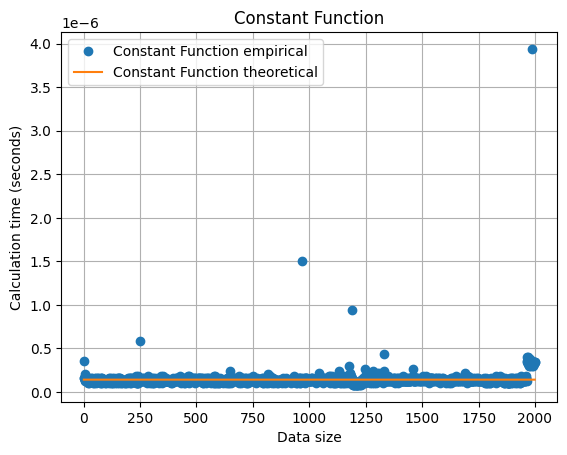

In [18]:
run_benchmark("1")


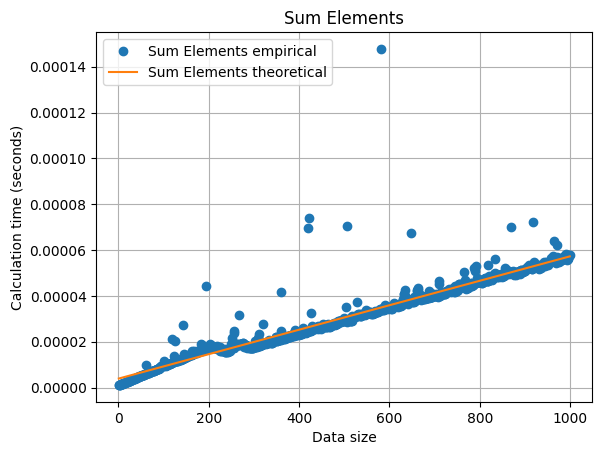

In [46]:
run_benchmark("2")

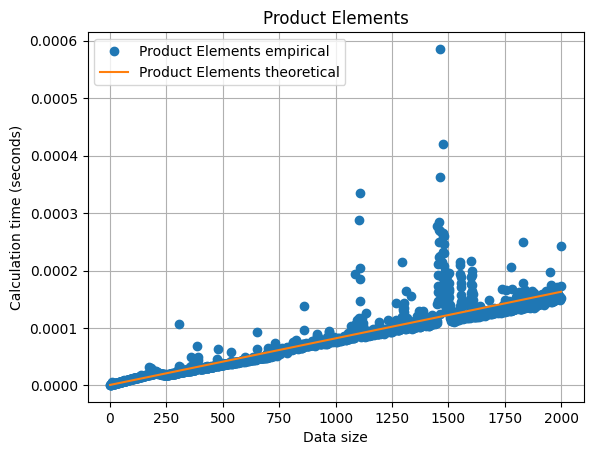

In [58]:
run_benchmark("3")

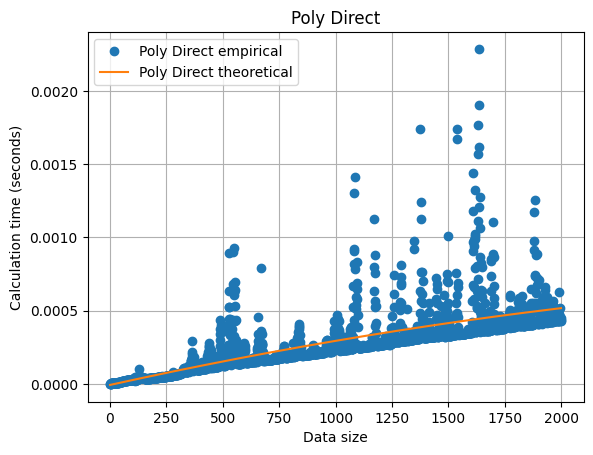

In [76]:
run_benchmark("4")

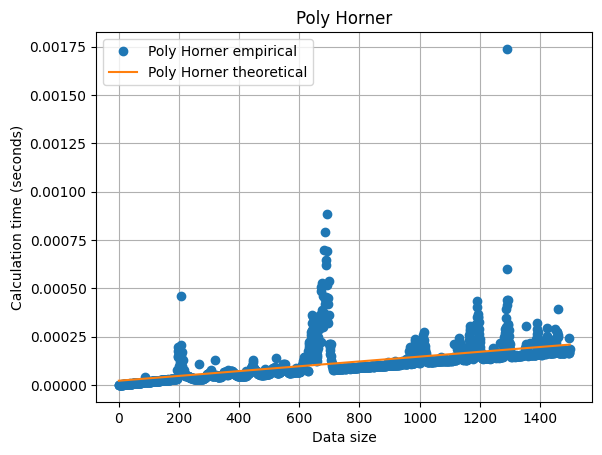

In [77]:
run_benchmark("5")

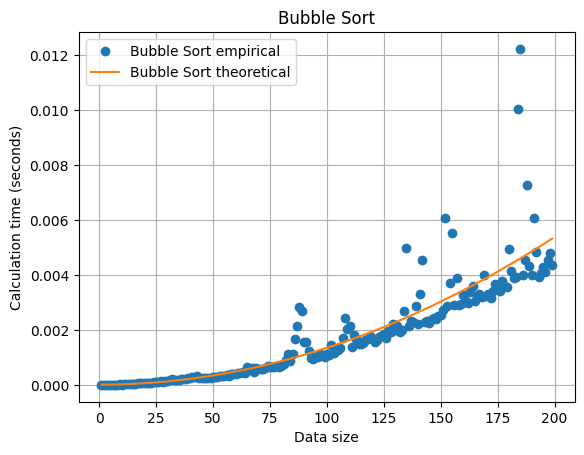

In [83]:
run_benchmark("6")

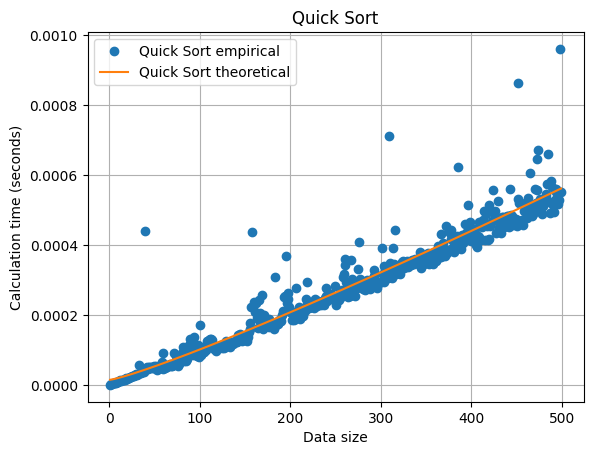

In [84]:
run_benchmark("7")

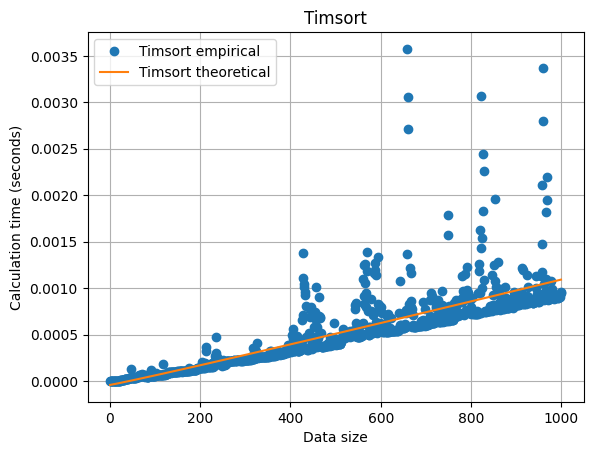

In [85]:
run_benchmark("8")

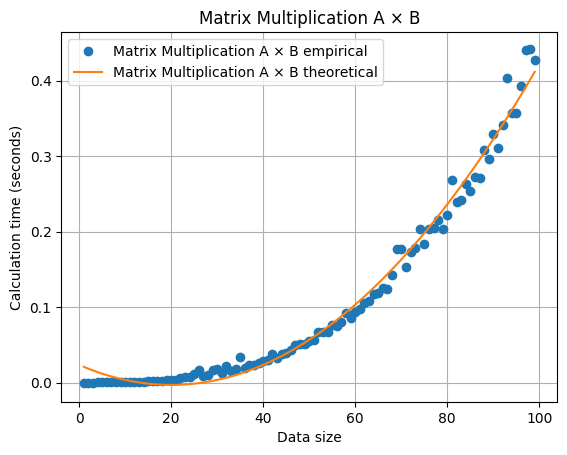

In [96]:
run_benchmark("9")